# Lei dos Grandes Números

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

def drop_reset_index(df):
    df = df.dropna()
    df = df.reset_index(drop=True)
    df.index += 1
    return df

In [2]:
base = pd.read_csv("https://github.com/futpythontrader/YouTube/raw/refs/heads/main/Bases_de_Dados/FootyStats/Base_de_Dados_FootyStats_(2006_2021).csv")
base["Date"] = pd.to_datetime(base["Date"])
base = base.sort_values('Date')
base = drop_reset_index(base)

# Criando coluna de Resultado
base.loc[(base['Goals_H_FT'] >  base['Goals_A_FT']), 'Resultado'] = 1
base.loc[(base['Goals_H_FT'] <= base['Goals_A_FT']), 'Resultado'] = 0

print("Tamanho da Base de Dados:",len(base),"Jogos")

Tamanho da Base de Dados: 169433 Jogos


In [3]:
flt = (base.Odd_H_FT >= 1.80) & (base.Odd_H_FT <= 2.20)
base = base[flt]
base = drop_reset_index(base)
base = base[['Date','League','Season','Home','Away','Goals_H_FT','Goals_A_FT','Odd_H_FT','Resultado']]

print("Tamanho da Base Filtrada:",len(base),"Jogos")

Tamanho da Base Filtrada: 30321 Jogos


In [9]:
df = base.sample(n=10)
display(df)

,Date,League,Season,Home,Away,Goals_H_FT,Goals_A_FT,Odd_H_FT,Resultado
15256,2018-04-19 15:45:00,England Premier League,2017/2018,Leicester City,Southampton,0,0,2.20,0.0
10332,2016-11-05 14:00:00,Spain Segunda División,2016/2017,Rayo Vallecano,UCAM Murcia CF,0,1,1.93,0.0
13818,2017-11-25 16:00:00,Spain Segunda División,2017/2018,AD Alcorcón,Sevilla II,0,0,1.95,0.0
4176,2014-11-02 11:00:00,Italy Serie A,2014/2015,Torino,Atalanta,0,0,1.90,0.0
17980,2019-01-01 12:00:00,England Championship,2018/2019,Hull City,Bolton Wanderers,6,0,1.80,1.0
16319,2018-08-18 13:00:00,Portugal LigaPro,2018/2019,Porto II,Farense,1,3,1.91,0.0
18201,2019-02-08 16:00:00,Netherlands Eerste Divisie,2018/2019,Eindhoven,PSV II,1,2,2.15,0.0
29838,2022-04-10 10:30:00,Italy Serie B,2021/2022,Ascoli,Reggina,2,0,2.05,1.0
5988,2015-07-12 16:00:00,USA MLS,2015,New York City,Toronto,4,4,2.08,0.0
13721,2017-11-18 12:00:00,England EFL League One,2017/2018,Peterborough United,Blackpool,0,1,2.06,0.0


Total de Jogos: 10
Total de Vitórias: 3
Total de Derrotas: 7
Taxa de Acerto: 30.0 %
Odd Justa 3.33



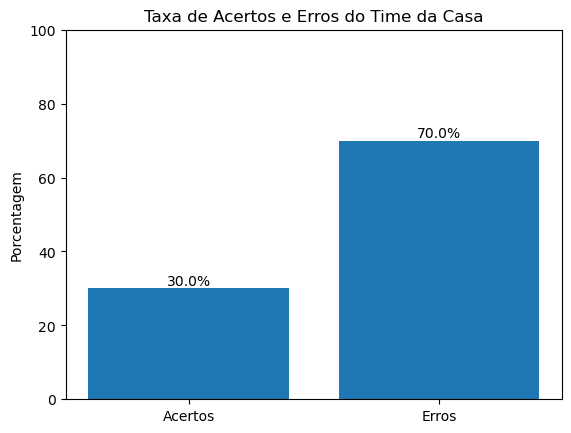

In [24]:
df = base.sample(n=10)

flt1 = df.Resultado == 1
win = df[flt1]
win = drop_reset_index(win)

flt2 = df.Resultado == 0
lose = df[flt2]
lose = drop_reset_index(lose)

total_de_jogos = len(df)
total_vitorias = len(win)
total_derrotas = len(lose)
porcentagem = round(total_vitorias / total_de_jogos,2)
odd_justa = round(1 / porcentagem,2)

print("Total de Jogos:",total_de_jogos)
print("Total de Vitórias:",total_vitorias)
print("Total de Derrotas:",total_derrotas)
print("Taxa de Acerto:",porcentagem*100,'%')
print("Odd Justa",odd_justa)
print("")

porcentagem_acertos = round(len(win) / len(df) * 100, 2)
porcentagem_erros = round(len(lose) / len(df) * 100, 2)

fig, ax = plt.subplots()
bars = ax.bar(['Acertos', 'Erros'], [porcentagem_acertos, porcentagem_erros])
ax.set_ylabel('Porcentagem')
ax.set_title('Taxa de Acertos e Erros do Time da Casa')

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}%', va='bottom', ha='center')

plt.ylim(0, 100)  
plt.show()

Total de Jogos: 100
Total de Vitórias: 40
Total de Derrotas: 60
Taxa de Acerto: 40.0 %
Odd Justa 2.5



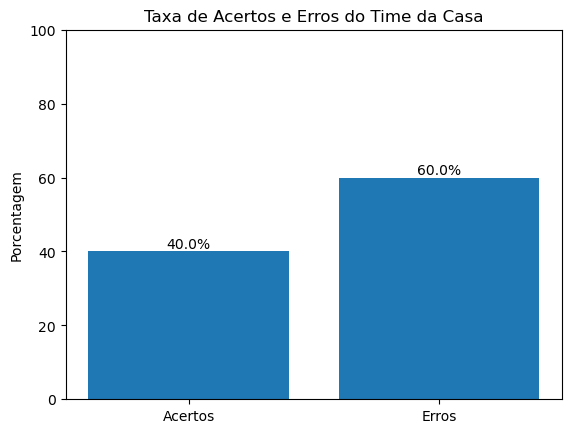

In [27]:
df = base.sample(n=100)

flt1 = df.Resultado == 1
win = df[flt1]
win = drop_reset_index(win)

flt2 = df.Resultado == 0
lose = df[flt2]
lose = drop_reset_index(lose)

total_de_jogos = len(df)
total_vitorias = len(win)
total_derrotas = len(lose)
porcentagem = round(total_vitorias / total_de_jogos,2)
odd_justa = round(1 / porcentagem,2)

print("Total de Jogos:",total_de_jogos)
print("Total de Vitórias:",total_vitorias)
print("Total de Derrotas:",total_derrotas)
print("Taxa de Acerto:",porcentagem*100,'%')
print("Odd Justa",odd_justa)
print("")

porcentagem_acertos = round(len(win) / len(df) * 100, 2)
porcentagem_erros = round(len(lose) / len(df) * 100, 2)

fig, ax = plt.subplots()
bars = ax.bar(['Acertos', 'Erros'], [porcentagem_acertos, porcentagem_erros])
ax.set_ylabel('Porcentagem')
ax.set_title('Taxa de Acertos e Erros do Time da Casa')

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}%', va='bottom', ha='center')

plt.ylim(0, 100)  
plt.show()

Total de Jogos: 1000
Total de Vitórias: 466
Total de Derrotas: 534
Taxa de Acerto: 47.0 %
Odd Justa 2.13



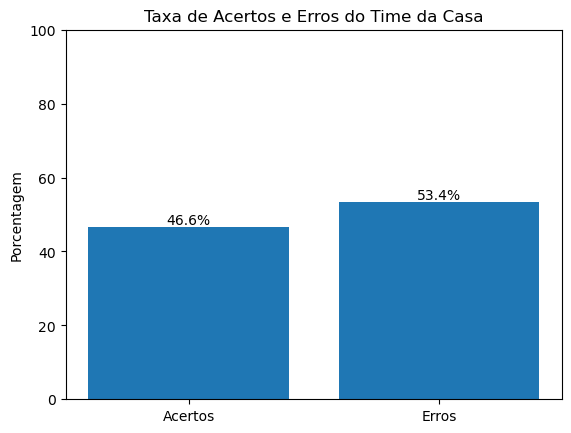

In [30]:
df = base.sample(n=1000)

flt1 = df.Resultado == 1
win = df[flt1]
win = drop_reset_index(win)

flt2 = df.Resultado == 0
lose = df[flt2]
lose = drop_reset_index(lose)

total_de_jogos = len(df)
total_vitorias = len(win)
total_derrotas = len(lose)
porcentagem = round(total_vitorias / total_de_jogos,2)
odd_justa = round(1 / porcentagem,2)

print("Total de Jogos:",total_de_jogos)
print("Total de Vitórias:",total_vitorias)
print("Total de Derrotas:",total_derrotas)
print("Taxa de Acerto:",porcentagem*100,'%')
print("Odd Justa",odd_justa)
print("")

porcentagem_acertos = round(len(win) / len(df) * 100, 2)
porcentagem_erros = round(len(lose) / len(df) * 100, 2)

fig, ax = plt.subplots()
bars = ax.bar(['Acertos', 'Erros'], [porcentagem_acertos, porcentagem_erros])
ax.set_ylabel('Porcentagem')
ax.set_title('Taxa de Acertos e Erros do Time da Casa')

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}%', va='bottom', ha='center')

plt.ylim(0, 100)  
plt.show()

Total de Jogos: 10000
Total de Vitórias: 4767
Total de Derrotas: 5233
Taxa de Acerto: 48.0 %
Odd Justa 2.08



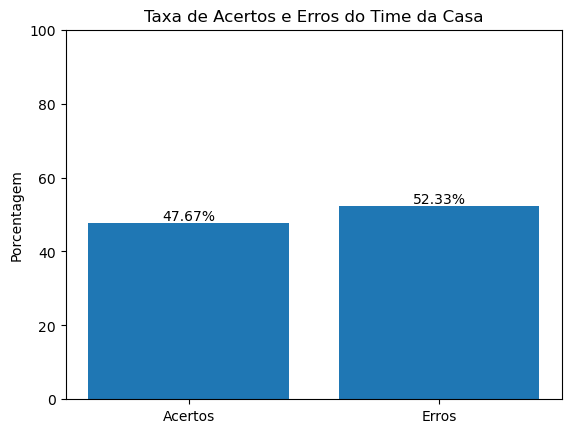

In [35]:
df = base.sample(n=10000)

flt1 = df.Resultado == 1
win = df[flt1]
win = drop_reset_index(win)

flt2 = df.Resultado == 0
lose = df[flt2]
lose = drop_reset_index(lose)

total_de_jogos = len(df)
total_vitorias = len(win)
total_derrotas = len(lose)
porcentagem = round(total_vitorias / total_de_jogos,2)
odd_justa = round(1 / porcentagem,2)

print("Total de Jogos:",total_de_jogos)
print("Total de Vitórias:",total_vitorias)
print("Total de Derrotas:",total_derrotas)
print("Taxa de Acerto:",porcentagem*100,'%')
print("Odd Justa",odd_justa)
print("")

porcentagem_acertos = round(len(win) / len(df) * 100, 2)
porcentagem_erros = round(len(lose) / len(df) * 100, 2)

fig, ax = plt.subplots()
bars = ax.bar(['Acertos', 'Erros'], [porcentagem_acertos, porcentagem_erros])
ax.set_ylabel('Porcentagem')
ax.set_title('Taxa de Acertos e Erros do Time da Casa')

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}%', va='bottom', ha='center')

plt.ylim(0, 100)  
plt.show()

Total de Jogos: 20000
Total de Vitórias: 9616
Total de Derrotas: 10384
Taxa de Acerto: 48.0 %
Odd Justa 2.08



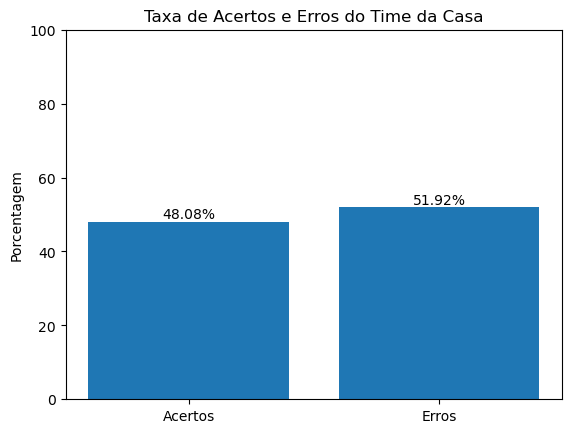

In [63]:
df = base.sample(n=20000)

flt1 = df.Resultado == 1
win = df[flt1]
win = drop_reset_index(win)

flt2 = df.Resultado == 0
lose = df[flt2]
lose = drop_reset_index(lose)

total_de_jogos = len(df)
total_vitorias = len(win)
total_derrotas = len(lose)
porcentagem = round(total_vitorias / total_de_jogos,2)
odd_justa = round(1 / porcentagem,2)

print("Total de Jogos:",total_de_jogos)
print("Total de Vitórias:",total_vitorias)
print("Total de Derrotas:",total_derrotas)
print("Taxa de Acerto:",porcentagem*100,'%')
print("Odd Justa",odd_justa)
print("")

porcentagem_acertos = round(len(win) / len(df) * 100, 2)
porcentagem_erros = round(len(lose) / len(df) * 100, 2)

fig, ax = plt.subplots()
bars = ax.bar(['Acertos', 'Erros'], [porcentagem_acertos, porcentagem_erros])
ax.set_ylabel('Porcentagem')
ax.set_title('Taxa de Acertos e Erros do Time da Casa')

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}%', va='bottom', ha='center')

plt.ylim(0, 100)  
plt.show()

Total de Jogos: 30000
Total de Vitórias: 14415
Total de Derrotas: 15585
Taxa de Acerto: 48.0 %
Odd Justa 2.08



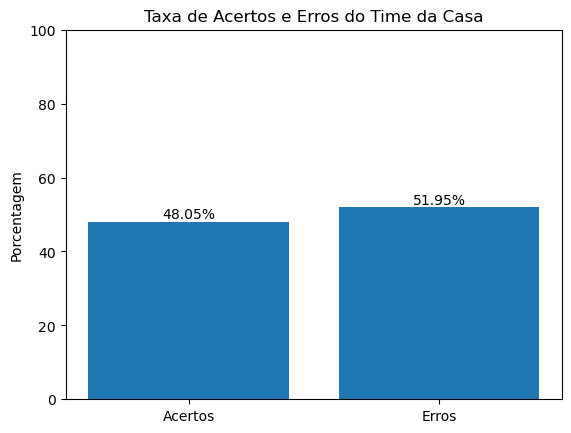

In [79]:
df = base.sample(n=30000)

flt1 = df.Resultado == 1
win = df[flt1]
win = drop_reset_index(win)

flt2 = df.Resultado == 0
lose = df[flt2]
lose = drop_reset_index(lose)

total_de_jogos = len(df)
total_vitorias = len(win)
total_derrotas = len(lose)
porcentagem = round(total_vitorias / total_de_jogos,2)
odd_justa = round(1 / porcentagem,2)

print("Total de Jogos:",total_de_jogos)
print("Total de Vitórias:",total_vitorias)
print("Total de Derrotas:",total_derrotas)
print("Taxa de Acerto:",porcentagem*100,'%')
print("Odd Justa",odd_justa)
print("")

porcentagem_acertos = round(len(win) / len(df) * 100, 2)
porcentagem_erros = round(len(lose) / len(df) * 100, 2)

fig, ax = plt.subplots()
bars = ax.bar(['Acertos', 'Erros'], [porcentagem_acertos, porcentagem_erros])
ax.set_ylabel('Porcentagem')
ax.set_title('Taxa de Acertos e Erros do Time da Casa')

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}%', va='bottom', ha='center')

plt.ylim(0, 100)  
plt.show()